Importação das bibliotecas necessárias.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Para facilitar o entendimento do banco de dados, exclui-se a coluna 13 que não é necessária e renomeia-se as colunas.

In [36]:
data = pd.read_csv("Dataset_spine.csv")
data = data.drop(['Unnamed: 13'], axis=1)
data.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

In [37]:
y = data['class']
x = data.drop(['class'], axis = 1)
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


Utiliza-se apenas 20% dos dados do banco de dados para usar como treinamento e o restante será alocado para uso no teste.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

Utiliza-se três camadas de unidades de processamento intermediário, a função sigmoidal como função de ativação e 500 como númrero máximo de interações.

In [39]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)

Iteration 1, loss = 0.64699710
Iteration 2, loss = 0.64178186
Iteration 3, loss = 0.63778467
Iteration 4, loss = 0.63550049
Iteration 5, loss = 0.63354912
Iteration 6, loss = 0.63184340
Iteration 7, loss = 0.63065593
Iteration 8, loss = 0.62907951
Iteration 9, loss = 0.62756442
Iteration 10, loss = 0.62573880
Iteration 11, loss = 0.62380375
Iteration 12, loss = 0.62154187
Iteration 13, loss = 0.61931788
Iteration 14, loss = 0.61665258
Iteration 15, loss = 0.61375022
Iteration 16, loss = 0.61085673
Iteration 17, loss = 0.60773244
Iteration 18, loss = 0.60399598
Iteration 19, loss = 0.59951720
Iteration 20, loss = 0.59434223
Iteration 21, loss = 0.58813329
Iteration 22, loss = 0.58217381
Iteration 23, loss = 0.57602792
Iteration 24, loss = 0.56878620
Iteration 25, loss = 0.56105643
Iteration 26, loss = 0.55279656
Iteration 27, loss = 0.54479204
Iteration 28, loss = 0.53567061
Iteration 29, loss = 0.52626177
Iteration 30, loss = 0.51759395
Iteration 31, loss = 0.50849511
Iteration 32, los

c:\users\jeff\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50, 25),
              max_iter=500, random_state=42, verbose=True)

In [40]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8225806451612904

Como pode-se ver, chegou-se a uma acurácia de 82% utilizando essa configuração de MLP.

In [41]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.88      0.86      0.87        44
      Normal       0.68      0.72      0.70        18

    accuracy                           0.82        62
   macro avg       0.78      0.79      0.79        62
weighted avg       0.83      0.82      0.82        62



O relatório nos mostra que obteve-se uma *precision* de 88% nos casos anormais e 68% nos casos normais, e um *recall* de 86% nos casos anormais e 72% nos casos normais.

A sinalização de *warning* diz que o número limite de interações foi alcançado, porém a otmização ainda não convergiu. Iremos dobrar o número de interações e verificaremos como o MPL se comporta com os mesmos valores de *hidden_layer_sizes* e após com os valores dobrados *hidden_layer_sizes*.

In [65]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=1000, random_state=42, verbose=True)
clf.fit(x_train, y_train)

Iteration 1, loss = 0.64794032
Iteration 2, loss = 0.64403069
Iteration 3, loss = 0.64134695
Iteration 4, loss = 0.63855577
Iteration 5, loss = 0.63622993
Iteration 6, loss = 0.63473405
Iteration 7, loss = 0.63335166
Iteration 8, loss = 0.63144280
Iteration 9, loss = 0.62985308
Iteration 10, loss = 0.62781059
Iteration 11, loss = 0.62629413
Iteration 12, loss = 0.62475817
Iteration 13, loss = 0.62303262
Iteration 14, loss = 0.62126306
Iteration 15, loss = 0.61914201
Iteration 16, loss = 0.61683822
Iteration 17, loss = 0.61482348
Iteration 18, loss = 0.61279067
Iteration 19, loss = 0.61023675
Iteration 20, loss = 0.60699149
Iteration 21, loss = 0.60325325
Iteration 22, loss = 0.59907870
Iteration 23, loss = 0.59494681
Iteration 24, loss = 0.59064080
Iteration 25, loss = 0.58524765
Iteration 26, loss = 0.58024153
Iteration 27, loss = 0.57529840
Iteration 28, loss = 0.57003237
Iteration 29, loss = 0.56454602
Iteration 30, loss = 0.55963823
Iteration 31, loss = 0.55402942
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50, 25),
              max_iter=1000, random_state=42, verbose=True)

In [66]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8494623655913979

Tivemos um aumento da *accuracy* de 82% para 84%

In [67]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.93      0.85      0.89        65
      Normal       0.71      0.86      0.77        28

    accuracy                           0.85        93
   macro avg       0.82      0.85      0.83        93
weighted avg       0.86      0.85      0.85        93



Tivemos uma melhora de *precision* e *recall* para ambaos os casos, se comporado com o experimento anterior. 

Agora iremos verificar o comportamento do MPL quando dobrandos os valores para o *hidden_layer_sizes*. 

In [68]:
clf = MLPClassifier(hidden_layer_sizes=(200,100,50,), activation='logistic', max_iter=1000, random_state=42, verbose=True)
clf.fit(x_train, y_train)

Iteration 1, loss = 0.65616967
Iteration 2, loss = 0.64064404
Iteration 3, loss = 0.63282457
Iteration 4, loss = 0.62837300
Iteration 5, loss = 0.62554842
Iteration 6, loss = 0.62201955
Iteration 7, loss = 0.61768033
Iteration 8, loss = 0.61407959
Iteration 9, loss = 0.61025937
Iteration 10, loss = 0.60576292
Iteration 11, loss = 0.59901343
Iteration 12, loss = 0.59029088
Iteration 13, loss = 0.58080925
Iteration 14, loss = 0.57001013
Iteration 15, loss = 0.55967766
Iteration 16, loss = 0.54928977
Iteration 17, loss = 0.53734818
Iteration 18, loss = 0.52389574
Iteration 19, loss = 0.50974601
Iteration 20, loss = 0.49343212
Iteration 21, loss = 0.48325379
Iteration 22, loss = 0.47688681
Iteration 23, loss = 0.46124030
Iteration 24, loss = 0.44701562
Iteration 25, loss = 0.43717249
Iteration 26, loss = 0.42816564
Iteration 27, loss = 0.42088997
Iteration 28, loss = 0.41414005
Iteration 29, loss = 0.40721256
Iteration 30, loss = 0.40057723
Iteration 31, loss = 0.39475946
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(200, 100, 50),
              max_iter=1000, random_state=42, verbose=True)

In [69]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8602150537634409

Verificamos uma melhora de 82 para 86% na *accuracy*.

In [70]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.92      0.88      0.90        65
      Normal       0.74      0.82      0.78        28

    accuracy                           0.86        93
   macro avg       0.83      0.85      0.84        93
weighted avg       0.87      0.86      0.86        93



Ao dobrar os valores da *hidden_layer_sizes* nós tivemos um aumento de pouco mais de 1% na acurácia, porém tivemos uma piora de *precision* tanto para os casos anormais quanto para os casos normais, enquanto o recall melhorou para os casos anormais e piorou para os casos normais.

Como o banco de dados é desbalanceado, visto o número de casos anormais e normais, o valor da acurácia não é um boa métrica para avaliar a MLP, portanto, deve-se atentar as métricas *precision* e *recall* do *report*, pois são elas que nos dirão se o MLP está classificando corretamente os casos. *Precision* se diz respeito a porcentagem dos casos selecionados daquela classe que foram classificados corretamente, já *recall* significa a porcentagem dos casos totais daquela classe que seriam classificados corretamente.

Vamos agora alterar alguns dos parâmetros da MLP:

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.67024566
Iteration 2, loss = 0.64236872
Iteration 3, loss = 0.63358321
Iteration 4, loss = 0.63752815
Iteration 5, loss = 0.64198806
Iteration 6, loss = 0.64131365
Iteration 7, loss = 0.63844617
Iteration 8, loss = 0.63671240
Iteration 9, loss = 0.63381061
Iteration 10, loss = 0.62967288
Iteration 11, loss = 0.62449397
Iteration 12, loss = 0.62125073
Iteration 13, loss = 0.61740508
Iteration 14, loss = 0.61322855
Iteration 15, loss = 0.60866736
Iteration 16, loss = 0.60480839
Iteration 17, loss = 0.59977024
Iteration 18, loss = 0.59384897
Iteration 19, loss = 0.58738872
Iteration 20, loss = 0.58148577
Iteration 21, loss = 0.57477812
Iteration 22, loss = 0.56644647
Iteration 23, loss = 0.55708925
Iteration 24, loss = 0.54686711
Iteration 25, loss = 0.53596548
Iteration 26, loss = 0.52380761
Iteration 27, loss = 0.51139480
Iteration 28, loss = 0.49765665
Iteration 29, loss = 0.48454518
Iteration 30, loss = 0.47046950
Iteration 31, loss = 0.45711939
Iteration 32, los

Como pode-se ver a acurácia, *precison* e o *recall* não mudaram muito.

Vamos agora tentar descobrir quais são as melhores variáveis para utilizar no nosso banco de dados da MLP para tentar maximizar a precisão dos casos.

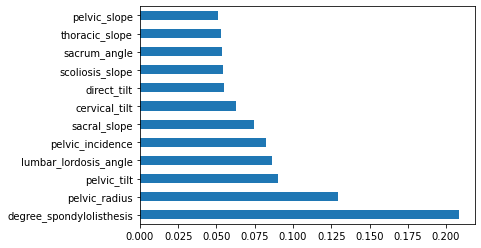

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

O gráfico nos mostra em ordem cresente as variáveis que mais impactam na classificação dos casos, logo, vamos descartar as primeiras 6 e utilizar o resto.

In [12]:
new_data = data[['degree_spondylolisthesis', 'pelvic_radius', 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'class']]
y = new_data['class']
x = new_data.drop(['class'], axis = 1)

Vamos treinar várias configurações de MLP para tentar descobrir uma possível boa implementação de MLP para o problema. 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)


Iteration 1, loss = 0.70112488
Iteration 2, loss = 0.68654367
Iteration 3, loss = 0.67462953
Iteration 4, loss = 0.66398732
Iteration 5, loss = 0.65432369
Iteration 6, loss = 0.64666128
Iteration 7, loss = 0.64006787
Iteration 8, loss = 0.63399689
Iteration 9, loss = 0.63055873
Iteration 10, loss = 0.62797376
Iteration 11, loss = 0.62460442
Iteration 12, loss = 0.62275161
Iteration 13, loss = 0.62038554
Iteration 14, loss = 0.61821419
Iteration 15, loss = 0.61588486
Iteration 16, loss = 0.61339693
Iteration 17, loss = 0.61064566
Iteration 18, loss = 0.60747443
Iteration 19, loss = 0.60388243
Iteration 20, loss = 0.60041992
Iteration 21, loss = 0.59622385
Iteration 22, loss = 0.59223184
Iteration 23, loss = 0.58780858
Iteration 24, loss = 0.58354370
Iteration 25, loss = 0.57911310
Iteration 26, loss = 0.57405196
Iteration 27, loss = 0.56849718
Iteration 28, loss = 0.56288560
Iteration 29, loss = 0.55697413
Iteration 30, loss = 0.55057633
Iteration 31, loss = 0.54448569
Iteration 32, los

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.92920079
Iteration 2, loss = 0.82382960
Iteration 3, loss = 0.74420212
Iteration 4, loss = 0.68556225
Iteration 5, loss = 0.65105628
Iteration 6, loss = 0.63663051
Iteration 7, loss = 0.63306369
Iteration 8, loss = 0.63498458
Iteration 9, loss = 0.63990479
Iteration 10, loss = 0.64611492
Iteration 11, loss = 0.64727877
Iteration 12, loss = 0.64367007
Iteration 13, loss = 0.63714182
Iteration 14, loss = 0.63000314
Iteration 15, loss = 0.62114728
Iteration 16, loss = 0.61419522
Iteration 17, loss = 0.60774688
Iteration 18, loss = 0.60491405
Iteration 19, loss = 0.60188012
Iteration 20, loss = 0.60046049
Iteration 21, loss = 0.59861906
Iteration 22, loss = 0.59550898
Iteration 23, loss = 0.59079922
Iteration 24, loss = 0.58449005
Iteration 25, loss = 0.57702586
Iteration 26, loss = 0.56996210
Iteration 27, loss = 0.56371703
Iteration 28, loss = 0.55889126
Iteration 29, loss = 0.55414330
Iteration 30, loss = 0.54803574
Iteration 31, loss = 0.53917196
Iteration 32, los

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 1.97472234
Iteration 2, loss = 1.35935726
Iteration 3, loss = 0.90675713
Iteration 4, loss = 0.63768017
Iteration 5, loss = 0.52984719
Iteration 6, loss = 0.46067279
Iteration 7, loss = 0.43085148
Iteration 8, loss = 0.43371842
Iteration 9, loss = 0.43469226
Iteration 10, loss = 0.43715639
Iteration 11, loss = 0.43537456
Iteration 12, loss = 0.42618680
Iteration 13, loss = 0.41712789
Iteration 14, loss = 0.40011792
Iteration 15, loss = 0.38494269
Iteration 16, loss = 0.37444458
Iteration 17, loss = 0.36625686
Iteration 18, loss = 0.35986137
Iteration 19, loss = 0.35304143
Iteration 20, loss = 0.34745063
Iteration 21, loss = 0.34312028
Iteration 22, loss = 0.34233631
Iteration 23, loss = 0.33923482
Iteration 24, loss = 0.33554918
Iteration 25, loss = 0.33296689
Iteration 26, loss = 0.33167874
Iteration 27, loss = 0.33060650
Iteration 28, loss = 0.33050589
Iteration 29, loss = 0.32802016
Iteration 30, loss = 0.33014913
Iteration 31, loss = 0.32816379
Iteration 32, los

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=13)
clf = MLPClassifier(hidden_layer_sizes=(100,300,500), max_iter=500, alpha=0.0001, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 3.18079898
Iteration 2, loss = 5.04165646
Iteration 3, loss = 2.35998278
Iteration 4, loss = 1.29743073
Iteration 5, loss = 1.91659888
Iteration 6, loss = 0.97303926
Iteration 7, loss = 0.77707179
Iteration 8, loss = 0.87384774
Iteration 9, loss = 0.44456998
Iteration 10, loss = 0.70615262
Iteration 11, loss = 0.57436232
Iteration 12, loss = 0.35634773
Iteration 13, loss = 0.61460735
Iteration 14, loss = 0.42709282
Iteration 15, loss = 0.43471760
Iteration 16, loss = 0.51345277
Iteration 17, loss = 0.36651977
Iteration 18, loss = 0.40189058
Iteration 19, loss = 0.38724482
Iteration 20, loss = 0.33092412
Iteration 21, loss = 0.36164592
Iteration 22, loss = 0.33506782
Iteration 23, loss = 0.33997134
Iteration 24, loss = 0.33061169
Iteration 25, loss = 0.32256396
Iteration 26, loss = 0.32658979
Iteration 27, loss = 0.31794164
Iteration 28, loss = 0.32367469
Iteration 29, loss = 0.31523371
Iteration 30, loss = 0.32279527
Iteration 31, loss = 0.32007023
Iteration 32, los

Pode-se ver que as últimas duas configurações de MLP apresentam excelentes resultados de acurácia, *precision* e *recall*, portanto, são possíveis boas candidatas a serem implementadas.

A equipe levantou a hipótese de que o fato de a quantidade de dados "Abnormal" estar acima da quantidade de dados "Normal" está baixando a precisão para classificação de dados "Normal" nos primeiros exemplos deste ralatório e baixando a acurácia geral nos dois exemplos acima (melhores resultados até então). Para testar isso, vamos igualar a quantidade de dados "Abnormal" e "Normal" com duas abordagens. Primeiro, expluindo os 110 primeiros dados "Abnormal" e depois, excluindo 110 dados "Abnormal" de modo aleatório.


Abaixo, segue o exemplo excluindo os 110 primeiros dados "Abnormal", utilizando o dataset do primeiro experimento e o MLP classifier do primeiro experimento, ou seja, antes da aplicação de todas as melhorias propostas pelos experimentos acima:

In [17]:
data1 = pd.read_csv("Dataset_spine.csv")
data1 = data1.drop(['Unnamed: 13'], axis=1)
data1.rename(columns = {
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class"}, inplace=True)

new_data_copy = data1

new_data3 = new_data_copy.copy()

for i in range(110):
    new_data3.drop((i+1),axis=0,inplace=True)

y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)
print(y.value_counts())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Normal      100
Abnormal    100
Name: class, dtype: int64
Iteration 1, loss = 0.70557907
Iteration 2, loss = 0.70216837
Iteration 3, loss = 0.69914504
Iteration 4, loss = 0.69651227
Iteration 5, loss = 0.69426537
Iteration 6, loss = 0.69238677
Iteration 7, loss = 0.69084330
Iteration 8, loss = 0.68958895
Iteration 9, loss = 0.68856457
Iteration 10, loss = 0.68769780
Iteration 11, loss = 0.68690556
Iteration 12, loss = 0.68610178
Iteration 13, loss = 0.68520861
Iteration 14, loss = 0.68416510
Iteration 15, loss = 0.68293005
Iteration 16, loss = 0.68147986
Iteration 17, loss = 0.67980555
Iteration 18, loss = 0.67790815
Iteration 19, loss = 0.67579307
Iteration 20, loss = 0.67346696
Iteration 21, loss = 0.67093678
Iteration 22, loss = 0.66821015
Iteration 23, loss = 0.66529510
Iteration 24, loss = 0.66219665
Iteration 25, loss = 0.65891446
Iteration 26, loss = 0.65543999
Iteration 27, loss = 0.65175675
Iteration 28, loss = 0.64784587
Iteration 29, loss = 0.64369002
Iteration 30, loss = 0.

Percebe-se que podemos alcançar resultados similares aos dois melhores resultados apresentados até então apenas com esta técnica.

Agora iremos verificar como ficam os valores de *precision*, *accurary* e *recall*, se mudarmos a proporção entre o *set_train* e *set_test* no caso em considerarços o *DataSet* original, o *DataSet* após a exclusão das 6 primeiras variáveis, e o *DataSet* após a exclusão de 110 casos anormais.

Mudando a proporção entre a quantidade de dados no conjunto de treinamento e a quantidade de dados no conjunto de teste. 
Deixaremos 40% para o conjunto de treinamento e 60% para o de teste.

No caso com o *DataSet* original:

In [18]:
y = data['class']
x = data.drop(['class'], axis = 1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.67084220
Iteration 2, loss = 0.65056247
Iteration 3, loss = 0.63627528
Iteration 4, loss = 0.62758501
Iteration 5, loss = 0.62371144
Iteration 6, loss = 0.62340548
Iteration 7, loss = 0.62505864
Iteration 8, loss = 0.62707060
Iteration 9, loss = 0.62831042
Iteration 10, loss = 0.62829727
Iteration 11, loss = 0.62706532
Iteration 12, loss = 0.62493334
Iteration 13, loss = 0.62231877
Iteration 14, loss = 0.61961870
Iteration 15, loss = 0.61714005
Iteration 16, loss = 0.61506189
Iteration 17, loss = 0.61342285
Iteration 18, loss = 0.61213405
Iteration 19, loss = 0.61101758
Iteration 20, loss = 0.60986145
Iteration 21, loss = 0.60847490
Iteration 22, loss = 0.60673110
Iteration 23, loss = 0.60458702
Iteration 24, loss = 0.60207441
Iteration 25, loss = 0.59927404
Iteration 26, loss = 0.59628608
Iteration 27, loss = 0.59319626
Iteration 28, loss = 0.59004313
Iteration 29, loss = 0.58680274
Iteration 30, loss = 0.58339684
Iteration 31, loss = 0.57971684
Iteration 32, los

Usando a mesma proporção de 40% e 60%, só que agora considerando a exclusão das 6 primerias variáveis.

In [20]:
y = new_data['class']
x = new_data.drop(['class'], axis = 1)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.70319625
Iteration 2, loss = 0.69528650
Iteration 3, loss = 0.68776258
Iteration 4, loss = 0.68062433
Iteration 5, loss = 0.67387756
Iteration 6, loss = 0.66753008
Iteration 7, loss = 0.66158698
Iteration 8, loss = 0.65605030
Iteration 9, loss = 0.65092011
Iteration 10, loss = 0.64619428
Iteration 11, loss = 0.64186780
Iteration 12, loss = 0.63793220
Iteration 13, loss = 0.63437521
Iteration 14, loss = 0.63118063
Iteration 15, loss = 0.62832892
Iteration 16, loss = 0.62579848
Iteration 17, loss = 0.62356623
Iteration 18, loss = 0.62160715
Iteration 19, loss = 0.61989356
Iteration 20, loss = 0.61839507
Iteration 21, loss = 0.61707882
Iteration 22, loss = 0.61591014
Iteration 23, loss = 0.61485375
Iteration 24, loss = 0.61387542
Iteration 25, loss = 0.61294359
Iteration 26, loss = 0.61203046
Iteration 27, loss = 0.61111243
Iteration 28, loss = 0.61017012
Iteration 29, loss = 0.60918758
Iteration 30, loss = 0.60815170
Iteration 31, loss = 0.60705222
Iteration 32, los

c:\users\jeff\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


E agora considerando a mesma porporção de 40% e 60%, só que considerando a exclusão de 110 casos anormais. 

In [22]:
y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.70328175
Iteration 2, loss = 0.70014312
Iteration 3, loss = 0.69738912
Iteration 4, loss = 0.69502247
Iteration 5, loss = 0.69303627
Iteration 6, loss = 0.69140865
Iteration 7, loss = 0.69009964
Iteration 8, loss = 0.68905278
Iteration 9, loss = 0.68819781
Iteration 10, loss = 0.68745390
Iteration 11, loss = 0.68673524
Iteration 12, loss = 0.68595973
Iteration 13, loss = 0.68505871
Iteration 14, loss = 0.68398339
Iteration 15, loss = 0.68270649
Iteration 16, loss = 0.68121965
Iteration 17, loss = 0.67952745
Iteration 18, loss = 0.67763920
Iteration 19, loss = 0.67556135
Iteration 20, loss = 0.67329511
Iteration 21, loss = 0.67083921
Iteration 22, loss = 0.66819364
Iteration 23, loss = 0.66536197
Iteration 24, loss = 0.66234903
Iteration 25, loss = 0.65915575
Iteration 26, loss = 0.65577604
Iteration 27, loss = 0.65219658
Iteration 28, loss = 0.64839830
Iteration 29, loss = 0.64435956
Iteration 30, loss = 0.64005817
Iteration 31, loss = 0.63547095
Iteration 32, los

Checando os valores de *precision*, *recall* e *accuracy* para os três casos, podemos observar que a mudança de proporção de 20% para 40% do *set_train*, não resultou em melhoras significativas. Tivemos um pequeno aumento da *accurary* de 78% para 81%, porém no caso da *precision* dos casos anormais, por exemplo, tivemos uma diminuição de 1%.

Irei realizar o mesmo experimento, porém agora o *set_train* terá 90% dos dados.

Com o dataSet original:

In [24]:
y = data['class']
x = data.drop(['class'], axis = 1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.65852627
Iteration 2, loss = 0.62411831
Iteration 3, loss = 0.59582311
Iteration 4, loss = 0.57342462
Iteration 5, loss = 0.55656374
Iteration 6, loss = 0.54473558
Iteration 7, loss = 0.53729024
Iteration 8, loss = 0.53344647
Iteration 9, loss = 0.53233454
Iteration 10, loss = 0.53305675
Iteration 11, loss = 0.53475935
Iteration 12, loss = 0.53671007
Iteration 13, loss = 0.53835658
Iteration 14, loss = 0.53934625
Iteration 15, loss = 0.53950655
Iteration 16, loss = 0.53880771
Iteration 17, loss = 0.53732649
Iteration 18, loss = 0.53521152
Iteration 19, loss = 0.53265077
Iteration 20, loss = 0.52984265
Iteration 21, loss = 0.52697282
Iteration 22, loss = 0.52419829
Iteration 23, loss = 0.52163592
Iteration 24, loss = 0.51935306
Iteration 25, loss = 0.51736518
Iteration 26, loss = 0.51564305
Iteration 27, loss = 0.51412704
Iteration 28, loss = 0.51273852
Iteration 29, loss = 0.51138606
Iteration 30, loss = 0.50998662
Iteration 31, loss = 0.50848312
Iteration 32, los

Usando a mesma proporção de 90% e 10%, só que agora considerando a exclusão das 6 primerias variáveis.

In [26]:
y = new_data['class']
x = new_data.drop(['class'], axis = 1)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.70801206
Iteration 2, loss = 0.69644288
Iteration 3, loss = 0.68526906
Iteration 4, loss = 0.67448786
Iteration 5, loss = 0.66410456
Iteration 6, loss = 0.65412720
Iteration 7, loss = 0.64456431
Iteration 8, loss = 0.63542316
Iteration 9, loss = 0.62670896
Iteration 10, loss = 0.61842515
Iteration 11, loss = 0.61057376
Iteration 12, loss = 0.60315510
Iteration 13, loss = 0.59616731
Iteration 14, loss = 0.58960624
Iteration 15, loss = 0.58346632
Iteration 16, loss = 0.57774171
Iteration 17, loss = 0.57242696
Iteration 18, loss = 0.56751646
Iteration 19, loss = 0.56300327
Iteration 20, loss = 0.55887758
Iteration 21, loss = 0.55512508
Iteration 22, loss = 0.55172671
Iteration 23, loss = 0.54865970
Iteration 24, loss = 0.54589884
Iteration 25, loss = 0.54341777
Iteration 26, loss = 0.54119020
Iteration 27, loss = 0.53919122
Iteration 28, loss = 0.53739801
Iteration 29, loss = 0.53578966
Iteration 30, loss = 0.53434636
Iteration 31, loss = 0.53304866
Iteration 32, los

E agora considerando a mesma porporção de 90% e 10%, só que considerando a exclusão de 110 casos anormais. 

In [28]:
y = new_data3['class']
x = new_data3.drop(['class'], axis = 1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.9, random_state=15)
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,), activation='logistic', max_iter=500, random_state=42, verbose=True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Iteration 1, loss = 0.75111819
Iteration 2, loss = 0.74304726
Iteration 3, loss = 0.73541977
Iteration 4, loss = 0.72823944
Iteration 5, loss = 0.72150647
Iteration 6, loss = 0.71521242
Iteration 7, loss = 0.70934410
Iteration 8, loss = 0.70389130
Iteration 9, loss = 0.69884568
Iteration 10, loss = 0.69419688
Iteration 11, loss = 0.68992963
Iteration 12, loss = 0.68602245
Iteration 13, loss = 0.68245006
Iteration 14, loss = 0.67918803
Iteration 15, loss = 0.67621601
Iteration 16, loss = 0.67351799
Iteration 17, loss = 0.67107989
Iteration 18, loss = 0.66888504
Iteration 19, loss = 0.66690915
Iteration 20, loss = 0.66511731
Iteration 21, loss = 0.66346626
Iteration 22, loss = 0.66191134
Iteration 23, loss = 0.66041205
Iteration 24, loss = 0.65893274
Iteration 25, loss = 0.65744283
Iteration 26, loss = 0.65591762
Iteration 27, loss = 0.65433771
Iteration 28, loss = 0.65268712
Iteration 29, loss = 0.65095189
Iteration 30, loss = 0.64912002
Iteration 31, loss = 0.64718060
Iteration 32, los

Assim que decidimos aumentar tão consideravelmente o *set_train*, pensamos que teríamos uma melhora no *precision*, *recall* e *accuracy* em todos os três casos, porém para os dois primeiros *dataSets* (o *dataSets* original e o *dataSets* que excluímos as 6 primeiras variavéis), tivemos uma piora muito significativa no *recall* para os casos normais e na *accuracy* para ambos os conjuntos de dados, já para o último *dataSet* (o que excluímos 110 casos anormais), obtivemos um excelente resultado para ambos os casos e uma *accuracy* de 96%. 